In [109]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
%matplotlib inline


# Построим модель для распознованя рукописных цифр

#### Загрузим обучающую и тестовую выборки


In [110]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Нормализуем выборки и изменим размерность

In [111]:
x_train = x_train / 255
x_test = x_test / 255

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

#### Создадим матрицу классов

In [112]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

#### Выведем первые 25 изображений из обучающей выборки

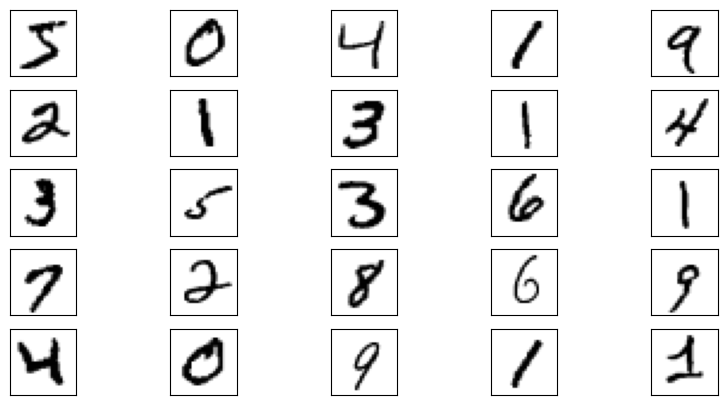

In [113]:
plt.figure(figsize=(10, 5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

#### Сформируем модель cо следующей структурой:
- Convolution layer 3x3
- Max-polling layer 2x2
- Flatten layer,
- Dense 64 layer activation='relu',
- Dropout,
- Dense 10 layer activation='softmax',

In [114]:
num_filters = 8
filter_size = 3
pool_size = 2

model = keras.Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(num_filters+8, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax'),
])

#### Прежде чем приступить к обучению необходимо добавить к модели оптимизатор, функцию ошибки и метрики

In [115]:
myAdam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=myAdam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_23 (Dense)            (None, 64)              

#### Приступим к обучению модели

In [116]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 24s 15ms/step - loss: 0.3700 - accuracy: 0.8889 - val_loss: 0.1156 - val_accuracy: 0.9691
Epoch 2/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2955 - accuracy: 0.9190 - val_loss: 0.1323 - val_accuracy: 0.9629
Epoch 3/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2928 - accuracy: 0.9213 - val_loss: 0.1266 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2866 - accuracy: 0.9240 - val_loss: 0.1592 - val_accuracy: 0.9604
Epoch 5/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3046 - accuracy: 0.9225 - val_loss: 0.1431 - val_accuracy: 0.9687


#### Проведём тестирование модели на тестовой выборке

In [117]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.1277 - accuracy: 0.9710


[0.12772919237613678, 0.9710000157356262]

#### Сделаем прогноз цифры

In [118]:
predictions = model.predict(x_test[:5])
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print(y_test[:5]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 76ms/step
[7 2 1 0 4]
[7 2 1 0 4]
